In [1]:
import pandas as pd
import seaborn as sns
import scipy as stats
import matplotlib as mpl
from matplotlib.pylab import plt
import importlib
base = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/'
file_confirmed = base+'time_series_covid19_confirmed_global.csv'
print(file_confirmed)
covid = pd.read_html(file_confirmed)[0]
covid.head()

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


,0,1
0,NaN,"Province/State,Country/Region,Lat,Long,1/22/20..."
1,NaN,",Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,..."
2,NaN,",Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0..."
3,NaN,",Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,..."
4,NaN,",Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,..."


## Transform the data into a dataframe with headers as dates

In [2]:
cols = covid.iloc[0,1].split(',')

In [3]:
df = pd.DataFrame(columns = cols)

for i in range(1,covid.shape[0]): 
    ddd = covid.iloc[i,1].split(',')
    df.loc[df.shape[0]] = ddd[0:len(cols)]
    
covid = df.copy(deep=True)

covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063
272,,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333
273,,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767
274,,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,93428,93627,93947,94430,94751,95050,95263,95821,96563,97388


## Select the US data

In [4]:

us = df[df['Country/Region']=='US'].copy(deep=True)
us.head()

cols = [col for col in us.columns if col[0].isdigit()]
cols[0:10]

us = us[cols].T
us.reset_index(inplace=True)
us.head()

us.columns = ['DATE', 'Total_Cases']
us.DATE = pd.to_datetime(us.DATE)
us.Total_Cases = us.Total_Cases.astype(float)


import math
maxcases = us.Total_Cases.max()
maxcases = math.ceil(maxcases/10**6)*10**6
us['WhichMillion'] = pd.cut(us.Total_Cases, bins = list(range(0, maxcases+1, 10**6)))
mills = us.WhichMillion.unique()

d = {}
for i in range(len(mills)):
    
    key = str(int(mills[i].right))
    delta = us[us.WhichMillion==mills[i]].DATE.max().date()- us[us.WhichMillion==mills[i]].DATE.min().date()
    delta = delta.days
    d[key] = [us[us.WhichMillion==mills[i]].DATE.min().date(), us[us.WhichMillion==mills[i]].DATE.max().date(),
             delta]
    
d

{'1000000': [datetime.date(2020, 1, 22), datetime.date(2020, 4, 26), 95],
 '2000000': [datetime.date(2020, 4, 27), datetime.date(2020, 6, 9), 43],
 '3000000': [datetime.date(2020, 6, 10), datetime.date(2020, 7, 6), 26],
 '4000000': [datetime.date(2020, 7, 7), datetime.date(2020, 7, 22), 15],
 '5000000': [datetime.date(2020, 7, 23), datetime.date(2020, 8, 7), 15],
 '6000000': [datetime.date(2020, 8, 8), datetime.date(2020, 8, 30), 22],
 '7000000': [datetime.date(2020, 8, 31), datetime.date(2020, 9, 24), 24],
 '8000000': [datetime.date(2020, 9, 25), datetime.date(2020, 10, 15), 20],
 '9000000': [datetime.date(2020, 10, 16), datetime.date(2020, 10, 29), 13],
 '10000000': [datetime.date(2020, 10, 30), datetime.date(2020, 11, 7), 8],
 '11000000': [datetime.date(2020, 11, 8), datetime.date(2020, 11, 13), 5],
 '12000000': [datetime.date(2020, 11, 14), datetime.date(2020, 11, 19), 5],
 '13000000': [datetime.date(2020, 11, 20), datetime.date(2020, 11, 25), 5],
 '14000000': [datetime.date(2020, 

## Creat the barchart below

Text(0.5, 1.0, 'Number of Days Between Millions of COVID-19 Cases in the US')

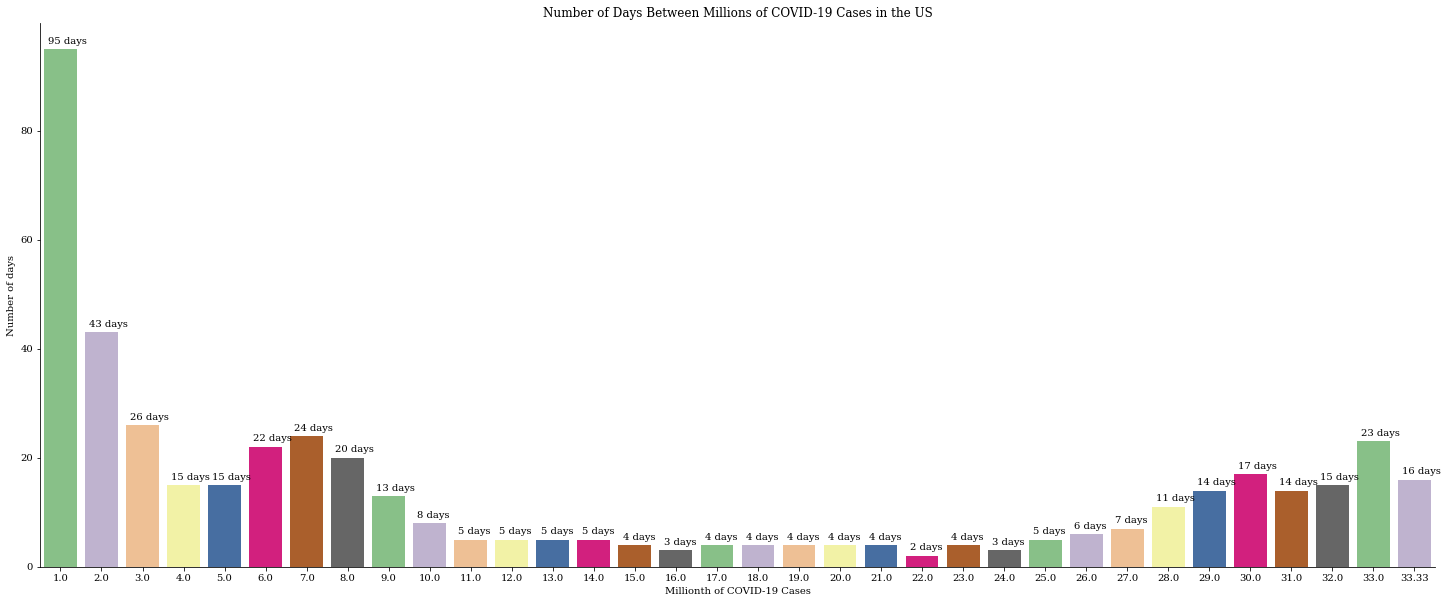

In [5]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Tahoma']
fig, ax = plt.subplots(1,1, figsize=(25, 10))

sns.barplot(x = [int(key)/10**6 for key in d.keys()], 
            y=[val[2] for val in d.values()], ax = ax, 
            palette='Accent'
           )

sns.despine()

for i in range(len(ax.get_xticklabels())):
    name = ax.get_xticklabels()[i].get_text()
    #print(name)
    name = int(name.replace('.0', ''))
    name *=1000000
    name = str(name)
    days = d[name][2]
    val  = d[name][1]
    ax.text(i-0.3, days+1, str(days)+' days')
    
corrected = [int(key)/10**6 for key in d.keys()]
corrected[-1] = round(us.Total_Cases.max()/10**6,2)
corrected
ax.set_xticklabels(corrected)

ax.set_ylabel('Number of days')
ax.set_xlabel('Millionth of COVID-19 Cases', fontdict={'family':'serif'})
ax.set_title('Number of Days Between Millions of COVID-19 Cases in the US')

